In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


In [3]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [4]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
data["Sleep Disorder"].fillna("No disorder", inplace = True)
data["BMI Category"].replace("Normal Weight", "Normal", inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


### Let's see if there is any trend on the occupation

In [7]:
# Calculate the means for multiple columns for each occupation
occupation_sleepdur_mean = data.groupby("Occupation")[["Sleep Duration","Quality of Sleep","Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]].mean()

# Extract occupation labels (x-values) and the means (y-values) for each column
occupations = occupation_sleepdur_mean.index
mean_sleep_durations = occupation_sleepdur_mean["Sleep Duration"]
mean_quality_of_sleep = occupation_sleepdur_mean["Quality of Sleep"]
mean_physical_activity = occupation_sleepdur_mean["Physical Activity Level"]
mean_stress_level = occupation_sleepdur_mean["Stress Level"]
mean_heart_rate = occupation_sleepdur_mean["Heart Rate"]
mean_daily_steps = occupation_sleepdur_mean["Daily Steps"]


In [8]:
occupation_sleepdur_mean

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Occupation,,,,,,
Accountant,7.113514,7.891892,58.108108,4.594595,68.864865,6881.081081
Doctor,6.970423,6.647887,55.352113,6.732394,71.521127,6808.450704
Engineer,7.987302,8.412698,51.857143,3.888889,67.190476,5980.952381
Lawyer,7.410638,7.893617,70.425532,5.063830,69.638298,7661.702128
Manager,6.900000,7.000000,55.000000,5.000000,75.000000,5500.000000
Nurse,7.063014,7.369863,78.589041,5.547945,72.000000,8057.534247
Sales Representative,5.900000,4.000000,30.000000,8.000000,85.000000,3000.000000
Salesperson,6.403125,6.000000,45.000000,7.000000,72.000000,6000.000000
Scientist,6.000000,5.000000,41.000000,7.000000,78.500000,5350.000000


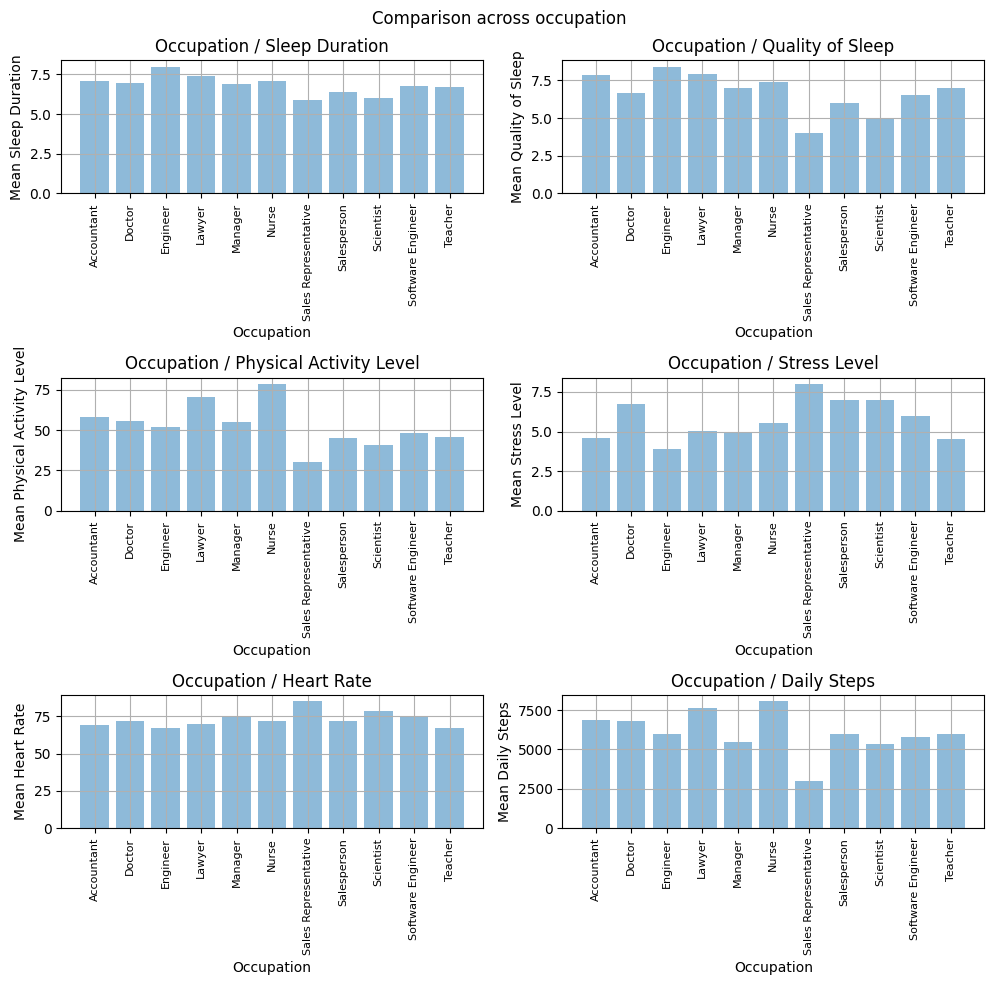

In [9]:
import matplotlib.pyplot as plt

# Create a list of columns you want to compare to the occupation
columns_to_compare = ["Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]

# Set the number of rows and columns for the subplots
num_rows = 3
num_cols = 2

# Create subplots with shared x-axis and a figure title
fig, axs = plt.subplots(num_rows, num_cols, sharex=False, figsize=(10, 10))
fig.suptitle("Comparison across occupation")

# Calculate and plot the mean for each variable in a subplot
for i, column in enumerate(columns_to_compare):
    # Calculate the mean for the current column
    column_mean = data.groupby("Occupation")[column].mean()
    
    # Extract occupation labels (x-values) and the mean values (y-values) for the current column
    occupations = column_mean.index
    mean_values = column_mean.values

    # Plot the current bar chart in the corresponding subplot
    row = i // num_cols
    col = i % num_cols
    axs[row, col].bar(occupations, mean_values, alpha=0.5)
    axs[row, col].set_title(f"Occupation / {column}")
    axs[row, col].set_xlabel("Occupation")
    axs[row, col].set_ylabel(f"Mean {column}")
    axs[row, col].grid(True)
    axs[row, col].tick_params(axis='x', labelrotation=90, labelsize=8)

# Adjust the layout
plt.tight_layout()

# Show the subplots
plt.show()


#### Let's look at the extreme one, Sales rep. They has the highest stress level, highest heart rate, lowest daily steps, lowest physical activity, lowest sleep quality and lowest sleep duration.
lets try do some correlation to see how the occupation reflect on each category  

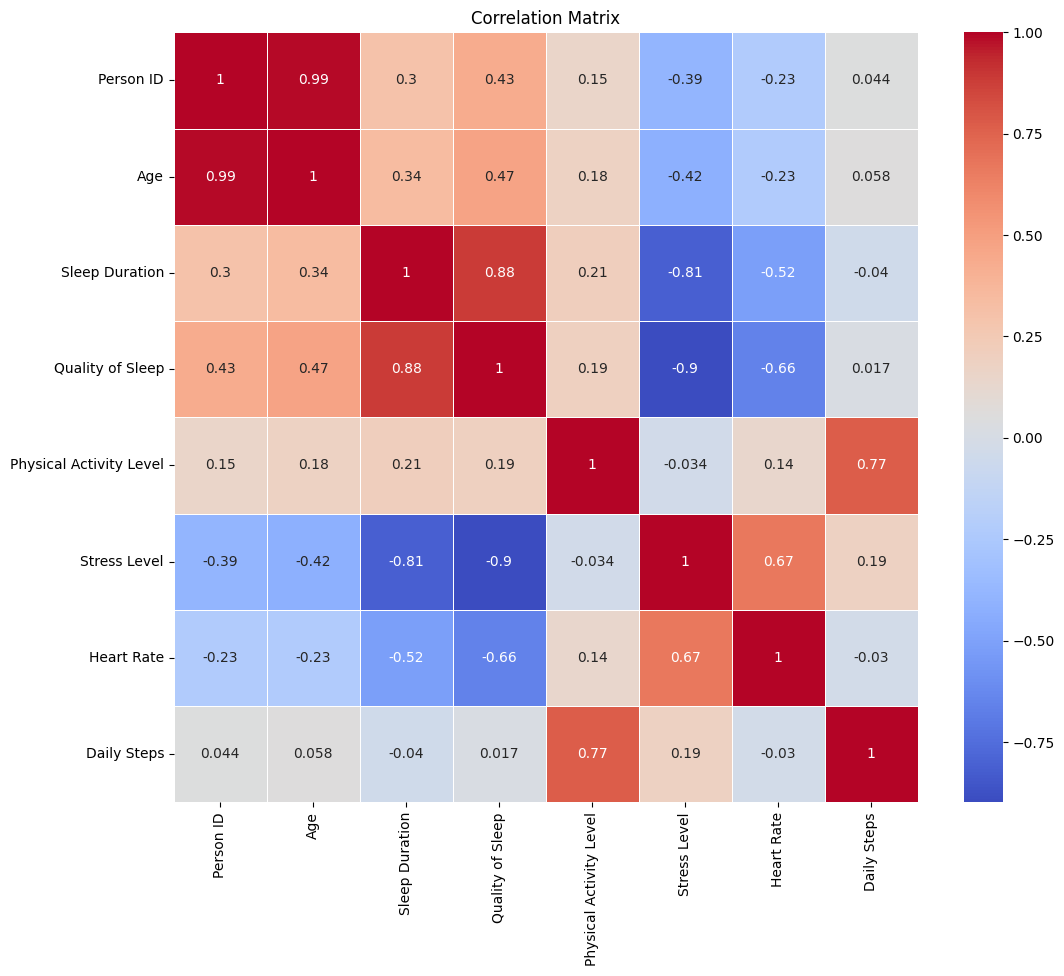

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the relevant columns
# Selecting only the numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap for the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


#### Here we can see this correlation 
####  Positive corr
Stress level - Heart Rate

Physical act - Daily steps

Sleep quality - Sleep duration

#### Negative corr
Sleep quality - Stress level 

Sleep quality - Heart rate 

Sleep dur - Stress level 


#### Lets see the distribution in term of BMI

### Let's see if there is any trend on the BMI Category

In [11]:
# Calculate the means for multiple columns for each occupation
bmi = data.groupby("BMI Category")[["Sleep Duration","Quality of Sleep","Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]].mean()

# Extract occupation labels (x-values) and the means (y-values) for each column
occupations =bmi.index
mean_sleep_durations =bmi ["Sleep Duration"]
mean_quality_of_sleep = bmi ["Quality of Sleep"]
mean_physical_activity = bmi ["Physical Activity Level"]
mean_stress_level = bmi ["Stress Level"]
mean_heart_rate = bmi ["Heart Rate"]
mean_daily_steps = bmi ["Daily Steps"]

In [12]:
bmi

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
BMI Category,,,,,,
Normal,7.387963,7.638889,57.949074,5.134259,68.976852,6875.462963
Obese,6.960000,6.400000,55.000000,5.700000,84.300000,3350.000000
Overweight,6.770270,6.898649,61.236486,5.729730,70.945946,6965.540541


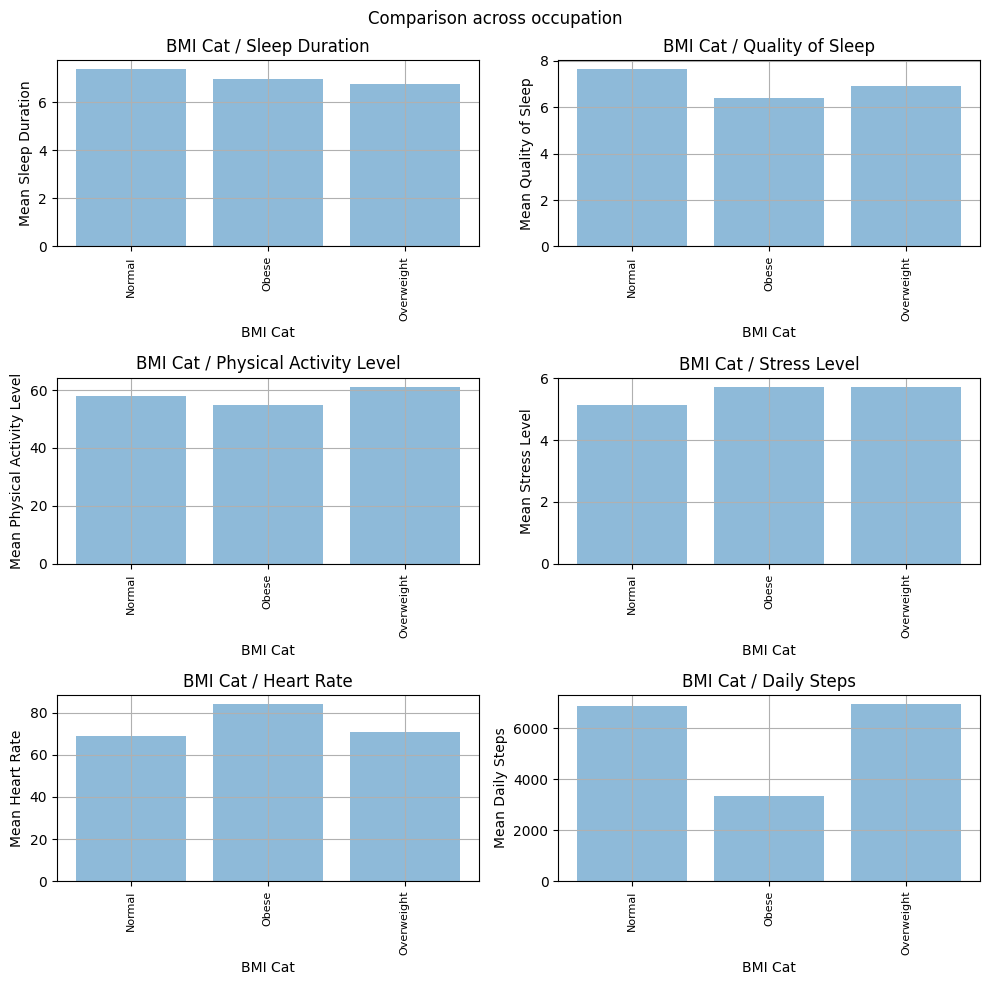

In [13]:
import matplotlib.pyplot as plt

# Create a list of columns you want to compare to the occupation
columns_to_compare = ["Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]

# Set the number of rows and columns for the subplots
num_rows = 3
num_cols = 2

# Create subplots with shared x-axis and a figure title
fig, axs = plt.subplots(num_rows, num_cols, sharex=False, figsize=(10, 10))
fig.suptitle("Comparison across occupation")

# Calculate and plot the mean for each variable in a subplot
for i, column in enumerate(columns_to_compare):
    # Calculate the mean for the current column
    column_mean = data.groupby("BMI Category")[column].mean()
    
    # Extract occupation labels (x-values) and the mean values (y-values) for the current column
    occupations = column_mean.index
    mean_values = column_mean.values

    # Plot the current bar chart in the corresponding subplot
    row = i // num_cols
    col = i % num_cols
    axs[row, col].bar(occupations, mean_values, alpha=0.5)
    axs[row, col].set_title(f"BMI Cat / {column}")
    axs[row, col].set_xlabel("BMI Cat")
    axs[row, col].set_ylabel(f"Mean {column}")
    axs[row, col].grid(True)
    axs[row, col].tick_params(axis='x', labelrotation=90, labelsize=8)

# Adjust the layout
plt.tight_layout()

# Show the subplots
plt.show()


### A/B Testing 

#### Do people with sleep disorder has lower sleep quality on average ? 

In [14]:
from scipy.stats import shapiro, kurtosis, skew, stats

# Perform the Shapiro-Wilk test
stat, p = shapiro(data["Quality of Sleep"])

# Check the p-value
if p > 0.05:
    print("Data appears to be normally distributed.")
else:
    print("Data does not appear to be normally distributed.")

# Calculate kurtosis and skewness
kurt = kurtosis(data["Quality of Sleep"])
skewness = skew(data["Quality of Sleep"])

# Check kurtosis and skewness values
if kurt == 3 and skewness == 0:
    print("Data has a normal distribution.")
else:
    print("Data does not have a normal distribution.")


Data does not appear to be normally distributed.
Data does not have a normal distribution.


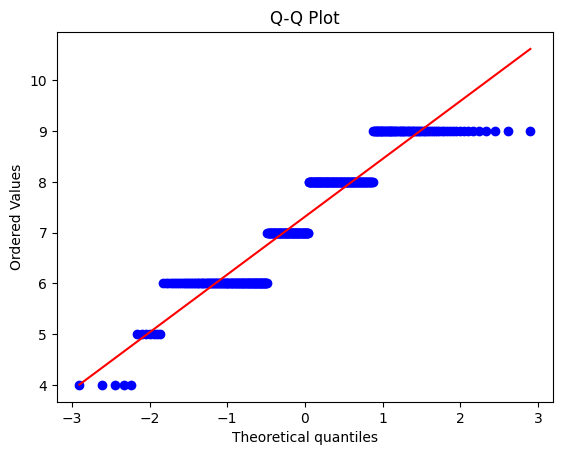

In [15]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate a Q-Q plot
stats.probplot(data["Quality of Sleep"], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


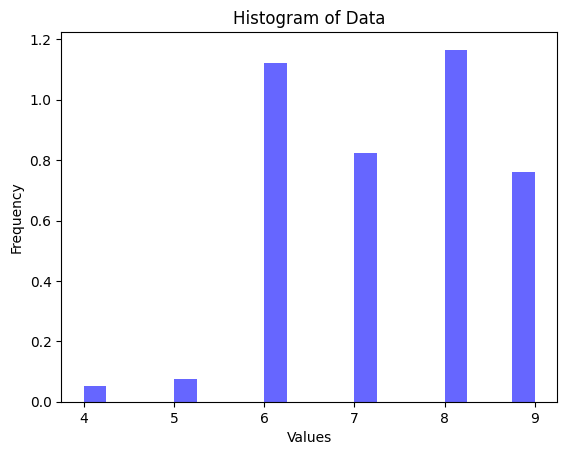

In [16]:
# Plot a histogram
plt.hist(data["Quality of Sleep"], bins=20, density=True, alpha=0.6, color='b')
plt.title('Histogram of Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [17]:
with_sleep_disorder = data[data['Sleep Disorder'] != "No disorder"]['Quality of Sleep']
without_sleep_disorder = data[data['Sleep Disorder'] == "No disorder"]['Quality of Sleep']
t_statistic, p_value = stats.ttest_ind(with_sleep_disorder, without_sleep_disorder)


print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("There is a significant difference in sleep quality between groups.")
else:
    print("There is no significant difference in sleep quality between groups.")

T-Statistic: -6.310971286065852
P-Value: 7.891508863720975e-10
There is a significant difference in sleep quality between groups.


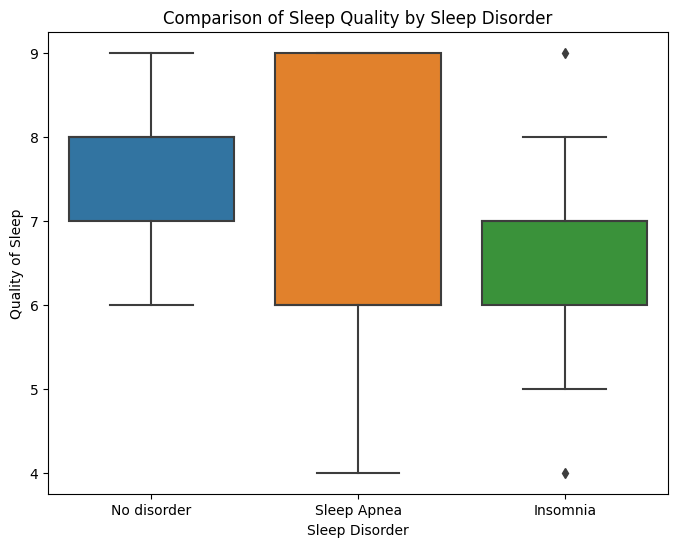

In [18]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=data)
plt.title("Comparison of Sleep Quality by Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Quality of Sleep")
plt.show()

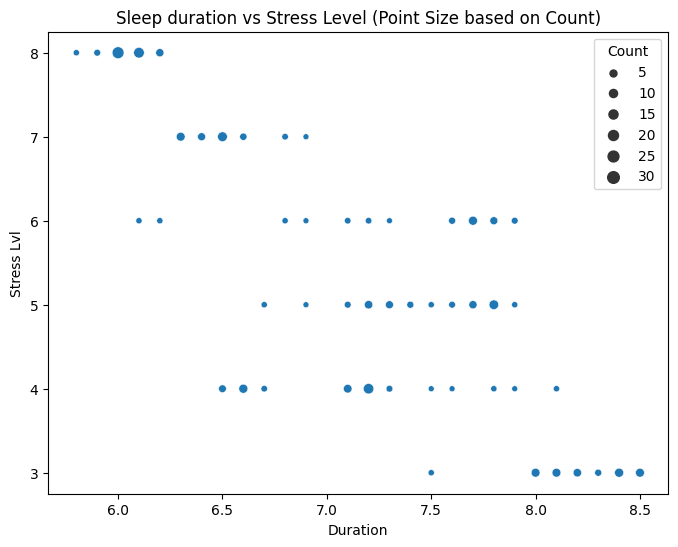

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the counts of each combination of "Sleep Duration" and "Stress Level"
counts = data.groupby(['Sleep Duration', 'Stress Level']).size().reset_index(name='Count')

plt.figure(figsize=(8, 6))

# Create a scatter plot with point sizes based on the counts
sns.scatterplot(x='Sleep Duration', y='Stress Level', size='Count', data=counts)

plt.title("Sleep duration vs Stress Level (Point Size based on Count)")
plt.xlabel("Duration")
plt.ylabel("Stress Lvl")

plt.show()


#### Seems like as the duration of the sleep decrease, the stress level increase. Or it could be the other way around. lets see the sleep quality. 

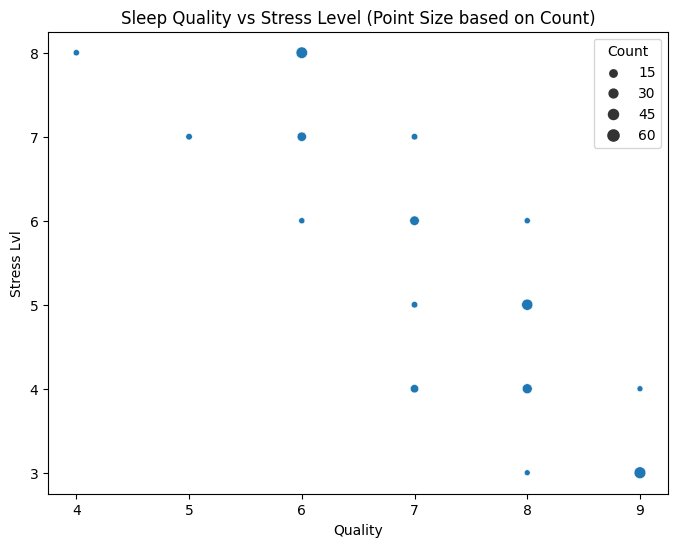

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the counts of each combination of "Sleep Duration" and "Stress Level"
counts = data.groupby(['Quality of Sleep', 'Stress Level']).size().reset_index(name='Count')

plt.figure(figsize=(8, 6))

# Create a scatter plot with point sizes based on the counts
sns.scatterplot(x='Quality of Sleep', y='Stress Level', size='Count', data=counts)

plt.title("Sleep Quality vs Stress Level (Point Size based on Count)")
plt.xlabel("Quality")
plt.ylabel("Stress Lvl")

plt.show()


#### Here we can see sleep quality reduce as the stress level increase. And it is at high as stress level is low. So which one is the influencer ? Does stress affecting sleep duration and quality ? or sleep quality and duration affecting stress level ? This relationship is birectional.

## Estimate the sleep quality based on other criteria

In [21]:
quality= data["Quality of Sleep"] 
dataset = data.drop(["Quality of Sleep", "Person ID"], axis = 1, errors = 'ignore')

In [22]:
dataset

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,42,6,Overweight,126/83,77,4200,No disorder
1,Male,28,Doctor,6.2,60,8,Normal,125/80,75,10000,No disorder
2,Male,28,Doctor,6.2,60,8,Normal,125/80,75,10000,No disorder
3,Male,28,Sales Representative,5.9,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,75,3,Overweight,140/95,68,7000,Sleep Apnea


#### Time to turn the occupation, and other category to nominal type

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["Gender"] = le.fit_transform(dataset["Gender"])
dataset["Occupation"] = le.fit_transform(dataset["Occupation"])
dataset["BMI Category"] = le.fit_transform(dataset["BMI Category"])
dataset["Sleep Disorder"] = le.fit_transform(dataset["Sleep Disorder"])
dataset

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,6.1,42,6,2,126/83,77,4200,1
1,1,28,1,6.2,60,8,0,125/80,75,10000,1
2,1,28,1,6.2,60,8,0,125/80,75,10000,1
3,1,28,6,5.9,30,8,1,140/90,85,3000,2
4,1,28,6,5.9,30,8,1,140/90,85,3000,2
...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,75,3,2,140/95,68,7000,2
370,0,59,5,8.0,75,3,2,140/95,68,7000,2
371,0,59,5,8.1,75,3,2,140/95,68,7000,2
372,0,59,5,8.1,75,3,2,140/95,68,7000,2


In [24]:
dataset.dtypes
# Lets split the blood pressure into systolic and diastolic pressure

Gender                       int32
Age                          int64
Occupation                   int32
Sleep Duration             float64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                 int32
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder               int32
dtype: object

In [25]:
# Assuming you have a DataFrame named 'dataset' and a column 'Blood Pressure' with data like "systolic /diastolic pressure"

# Split the 'Blood Pressure' column into two separate columns
dataset[['systolic', 'diastolic']] = dataset['Blood Pressure'].str.split('/', expand=True)

# Convert the resulting columns to numeric if needed
dataset['systolic'] = pd.to_numeric(dataset['systolic'])
dataset['diastolic'] = pd.to_numeric(dataset['diastolic'])

dataset.drop(["Blood Pressure"], axis = 1, inplace = True)

### Decision tree

In [26]:
# Lets use decision tree for the first one

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(dataset, quality, test_size=0.20, random_state=20)

dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = dt.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.9866666666666667

Confusion Matrix:
 [[18  0  0  0]
 [ 0 13  0  0]
 [ 0  1 28  0]
 [ 0  0  0 15]]

Classification Report:
               precision    recall  f1-score   support

           6       1.00      1.00      1.00        18
           7       0.93      1.00      0.96        13
           8       1.00      0.97      0.98        29
           9       1.00      1.00      1.00        15

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



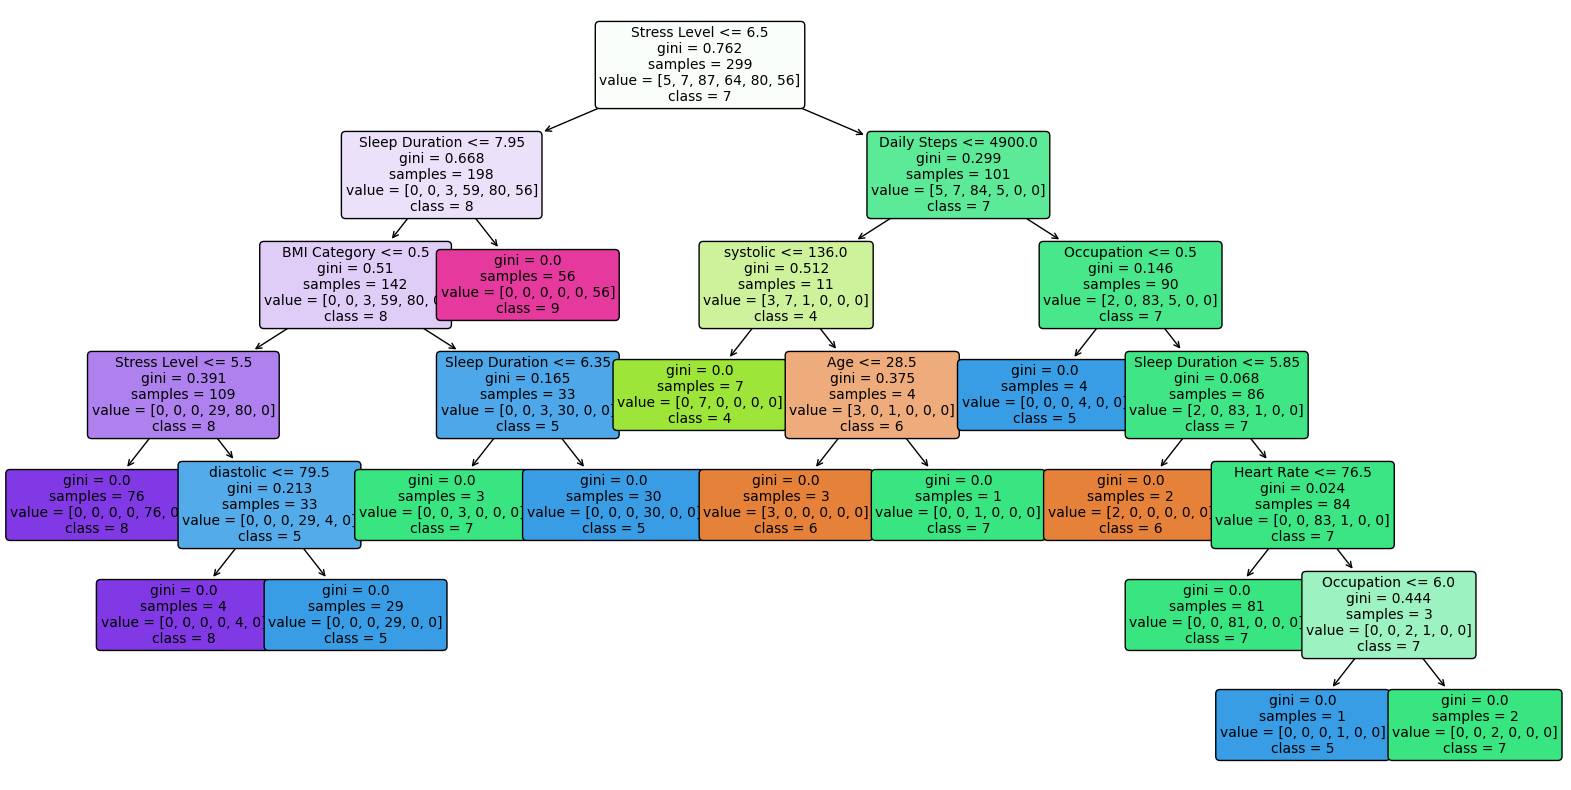

In [28]:
from sklearn import tree
import matplotlib.pyplot as plt

# Create a DecisionTreeClassifier and fit it to your data (assuming you've already done this)
# dt = DecisionTreeClassifier()
# dt.fit(X_train, y_train)

feature_names = list(dataset.columns)
class_names = list(map(str, quality.unique()))


# Visualize the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
tree.plot_tree(dt, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)



# Show the plot
plt.show()


### Let's try unsupervised - k mean

##### To  find any similarities in group in term of sleep quality and the other variables

In [29]:
from sklearn.cluster import KMeans
# We can just use "dataset" from previous operation
k = 3
kmeans = KMeans(n_clusters= k, random_state= 1)
kmeans.fit(dataset)

c:\Users\Fikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=1)

In [30]:
# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to your DataFrame
dataset['Cluster'] = cluster_labels

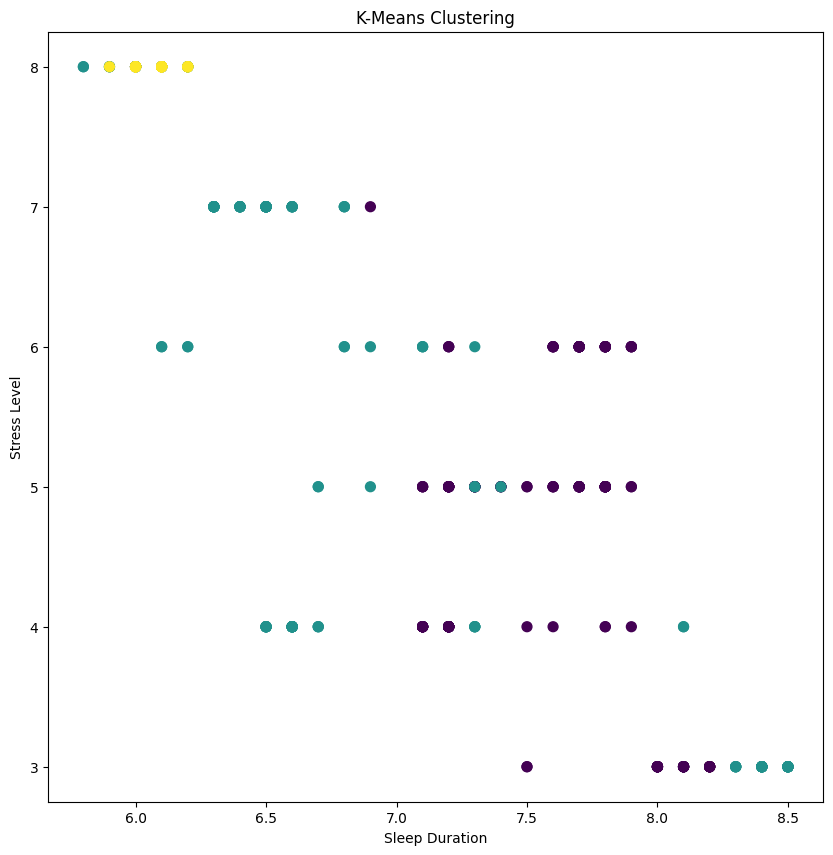

In [31]:
plt.figure(figsize= (10,10))
plt.scatter(dataset['Sleep Duration'], dataset['Stress Level'], c=cluster_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')
plt.show()

In [32]:
cluster_centers = kmeans.cluster_centers_
cluster_sizes = np.bincount(cluster_labels)

# Print some cluster information
for i in range(k):
    print(f"Cluster {i} - Size: {cluster_sizes[i]}, Center: {cluster_centers[i]}")

Cluster 0 - Size: 174, Center: [6.03448276e-01 4.04252874e+01 2.59195402e+00 7.55000000e+00
 7.02413793e+01 4.70114943e+00 3.67816092e-01 6.89080460e+01
 7.58620690e+03 1.16091954e+00 1.25873563e+02 8.32931034e+01]
Cluster 1 - Size: 164, Center: [5.00000000e-01 4.25792683e+01 4.85365854e+00 6.89512195e+00
 4.10243902e+01 5.59756098e+00 1.08536585e+00 7.05609756e+01
 5.30182927e+03 6.64634146e-01 1.29335366e+02 8.42439024e+01]
Cluster 2 - Size: 36, Center: [5.55555556e-02 4.88888889e+01 4.55555556e+00 6.19166667e+00
 8.83333333e+01 7.72222222e+00 1.77777778e+00 7.44444444e+01
 1.00000000e+04 1.77777778e+00 1.37944444e+02 9.30555556e+01]


### Let's do some pca on this data

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
# Standardize the features (important for PCA)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_features)

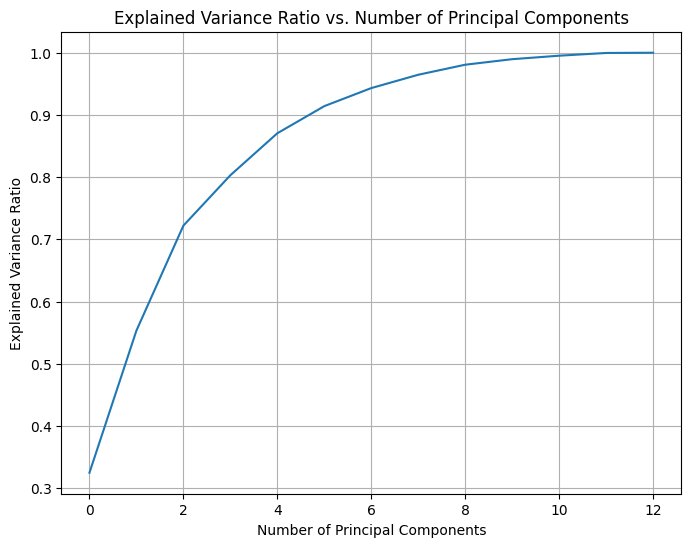

In [34]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [35]:
# Determine the number of principal components to retain based on the explained variance
# For example, let's say you want to retain 95% of the variance
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of Principal Components to Retain: {num_components}")

Number of Principal Components to Retain: 8


In [36]:
# Perform PCA again with the selected number of components
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, num_components + 1)])


In [37]:
principal_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.627610,2.938574,1.242445,-0.414304,1.092593,1.752374,0.383115,0.724213
1,-0.377485,2.982523,-2.054535,0.869444,-1.395786,-0.837809,-0.315453,1.055705
2,-0.377485,2.982523,-2.054535,0.869444,-1.395786,-0.837809,-0.315453,1.055705
3,1.822896,3.863087,0.148123,1.285168,3.439255,1.603933,-0.252658,0.212867
4,1.822896,3.863087,0.148123,1.285168,3.439255,1.603933,-0.252658,0.212867
...,...,...,...,...,...,...,...,...
369,2.280856,-3.435108,-0.219247,-0.128006,1.044766,0.437745,-0.273794,-0.690711
370,2.304898,-3.375113,-0.217300,-0.125848,1.007744,0.458365,-0.287032,-0.732315
371,2.280856,-3.435108,-0.219247,-0.128006,1.044766,0.437745,-0.273794,-0.690711
372,2.280856,-3.435108,-0.219247,-0.128006,1.044766,0.437745,-0.273794,-0.690711


c:\Users\Fikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Fikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Fikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Fikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

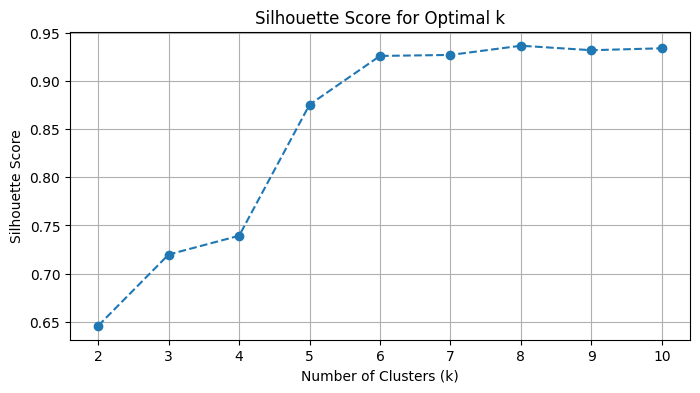

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Create an empty list to store the Silhouette Scores for different k
silhouette_scores = []

# Try different values of k (e.g., from 2 to 10) and compute Silhouette Score for each k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(dataset)  # Use your data here
    silhouette_avg = silhouette_score(dataset, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Score graph
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


c:\Users\Fikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


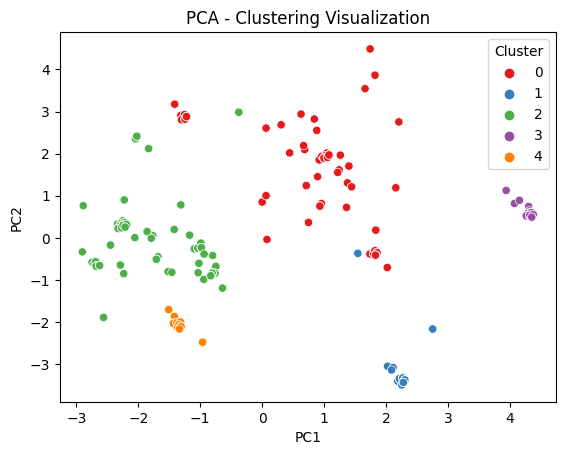

In [56]:
# Combine scores of principal components with your original data (if needed)
combined_data = pd.concat([data, principal_df], axis=1)

# Perform clustering using K-means (you can choose the number of clusters, k, based on your problem)
from sklearn.cluster import KMeans

# Let's assume you choose k=3 clusters
kmeans = KMeans(n_clusters=5, init = "k-means++")
cluster_labels = kmeans.fit_predict(principal_df)

# Add the cluster labels to your DataFrame
combined_data['Cluster'] = cluster_labels

# Visualization (you can choose various plots based on your preference)
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of the first two principal components with color-coded clusters
sns.scatterplot(data=combined_data, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('PCA - Clustering Visualization')
plt.show()
